## BASIC LINEAR REGRESSION

In [26]:
import pandas as pd
ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()   # we have a little problem with unnamed index.It took it as a ivariable.But we can solve it easily

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
df=df.iloc[:,1:len(df)] #problem solved

In [28]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [31]:
df.isnull().values.any() # Is there any missing value ?

False

In [32]:
df.corr() #we are analyzing the correlation between variables

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


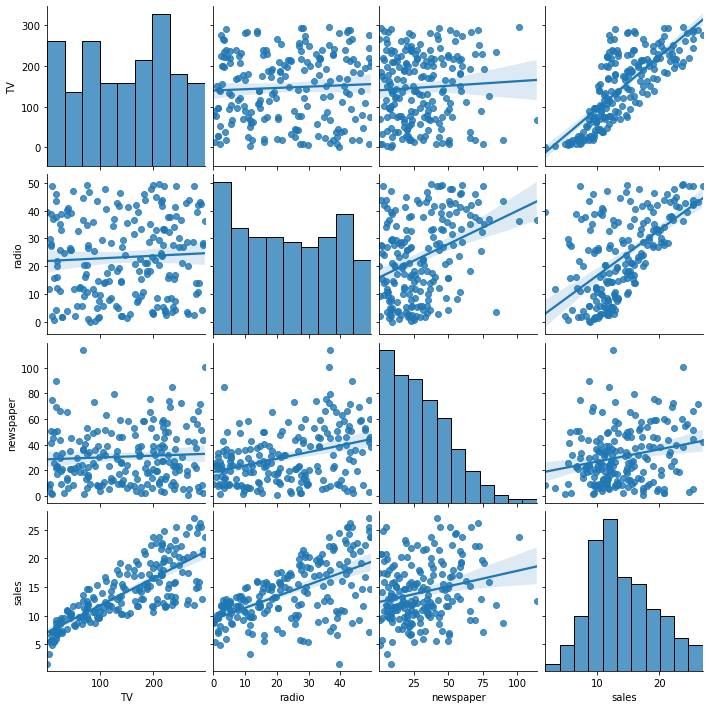

In [33]:
import seaborn as sns
sns.pairplot(df,kind="reg")

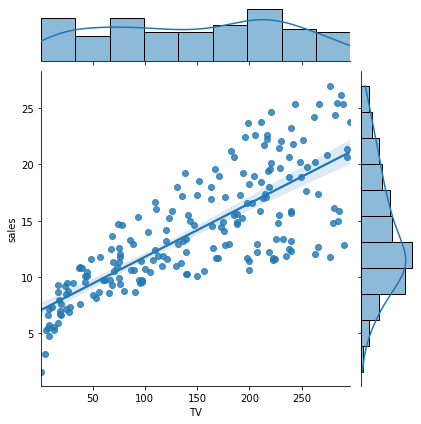

In [34]:
 sns.jointplot(x="TV",y="sales",data=df,kind="reg") # we kinda understand relation between sales and media types before forming a model

## Modelling with Statsmodels

In [35]:
import statsmodels.api as sm

In [36]:
X=df[["TV"]] #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [37]:
X=sm.add_constant(X) # we just did it for matrix operation

In [38]:
y=df["sales"] #we also formed our dependent value

In [39]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [40]:
lm=sm.OLS(y,X) # linearmode=lm; y dependent value;X independent value

In [41]:
model=lm.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        09:44:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# R-squared value = It is a success of explaining variability in the dependent variable of independent variable
# so we can say that "tv variable" could explain" of the variability in the "sales variable" by %60"
# Prob(F-statistic) is the p-value so we can say that model is significant
# const-coef value is the point where it cuts the y axis.So it is expeceted value of y.Kinda average sales,
# if "TV" doesnot have affect on the sales 7.03(const-coef value) is the value we already expect
#So what is the TV-coef value ?
# when there is one unit  increment in TV values,there would be an increment in the sales by 0.0475(TV-coef value)

In [44]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df) # if we want to name it we can also use this code 
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        09:44:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [46]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [47]:
model.conf_int() # if we want to reach parameters of direction interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [48]:
model.f_pvalue

1.4673897001947095e-42

In [49]:
print("f_pvalue","%.2f" % model.f_pvalue)

f_pvalue 0.00


In [50]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [51]:
model.mse_model

3314.6181668686486

In [52]:
model.rsquared

0.611875050850071

In [53]:
model.fittedvalues[0:5] # these are predicted values

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [54]:
y[0:5] # real values

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [55]:
# let's set the equation

In [56]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


C:\Users\bbzyu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


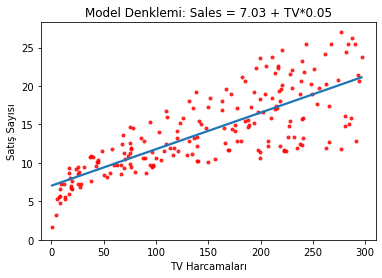

In [57]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_ # it doesn't have summary func so we did it

array([0.04753664])

In [60]:
model.score(X,y) #R-squared values

0.611875050850071

In [61]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Predicton

In [62]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

#### Sales = 7.03 + TV*0.05

In [63]:
model.predict([[30]])

array([8.45869276])

## MULTIPLE LINEAR REGRESSION

In [64]:
## modelling

In [65]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [66]:
X=df.drop("sales",axis=1)  #indepent values

In [67]:
y=df[["sales"]] # dependent values

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [70]:
y_train.shape

(160, 1)

In [71]:
training=df.copy()

## Statsmodels

In [74]:
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                   1.28e-137
Time:                        09:45:07   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


In [ ]:
# R-squared explains alteration in the dependent values by independent values

In [76]:
# it can tell us how much we can explain dependent values by using independent values 

In [77]:
# F-statistic evaluate significance

## scikit-learn model

In [78]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [79]:
model.intercept_ ## y=ax+b ---> b

array([2.97906734])

In [80]:
model.coef_ ##y=ax+b ---> a

array([[0.04472952, 0.18919505, 0.00276111]])

## Predict

In [81]:
## Sales = 2.97906734 + TV*0.04472952 + radio*0.18919505 + newspaper* 0.00276111

In [112]:
yeni_veri=[[30],[10],[40]]
yeni_veri=pd.DataFrame(yeni_veri).T # .T is crucial

In [113]:
model.predict(yeni_veri) 

array([[6.32334798]])

In [86]:
# so let's learn error of the education set

In [114]:
import numpy as np
from sklearn.metrics import mean_squared_error 
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train))) 
## model.predict(X_train) takes 3 values and predict the dependent value and
## we mean_squared_between these two values after that we squared again to find rmse

In [115]:
rmse

1.644727765644337

In [94]:
model.predict(X_train)

array([[ 9.68827502],
       [12.67337707],
       [10.0553326 ],
       [ 8.20010235],
       [13.49562077],
       [ 5.42585998],
       [ 9.2767456 ],
       [14.14222434],
       [ 8.83116901],
       [11.63897134],
       [15.42650259],
       [11.89014523],
       [12.82693587],
       [10.82735757],
       [ 6.58862301],
       [ 9.93190159],
       [ 9.51414822],
       [24.0815284 ],
       [ 7.70552541],
       [12.49609325],
       [17.71880786],
       [15.28339577],
       [11.42760282],
       [10.86633369],
       [16.78110726],
       [ 6.93551369],
       [21.35732668],
       [ 6.16937955],
       [ 9.93897566],
       [11.52842846],
       [ 9.29612342],
       [ 6.59177689],
       [14.90122344],
       [17.32216187],
       [15.80154544],
       [16.28133624],
       [14.94912051],
       [19.55991189],
       [13.87795425],
       [21.04366162],
       [12.62381325],
       [13.80024106],
       [ 8.96290787],
       [17.00702846],
       [ 8.41601918],
       [15

In [96]:
y_train

,sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6
...,...
106,7.2
14,19.0
92,19.4
179,12.6


In [125]:
X=df.drop("sales",axis=1)
y=df[["sales"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=144)
lm=LinearRegression()
model= lm.fit(X_train,y_train)

In [126]:
 model.score(X_train,y_train) # when random score changes this score will change so

0.8971614078663419

In [142]:
cross_val_score(model,X,y,cv=10,scoring="r2")

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [141]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

0.8853562237979616

In [144]:
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train))) 
rmse

1.6748559274650712

In [146]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872927

In [147]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

## PCR - principal component regression

In [4]:
# PCR lays on the idea of regression model setup after variable dimension reduction apply

In [5]:
## PCR Modelling

In [6]:
import pandas as pd
import numpy as np

In [11]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [14]:
## we have so many variables so we should do some preprocessing operations

In [15]:
## we can transform categorical variables to dummy variables

In [18]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [22]:
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [23]:
y=df["Salary"] ## we determine our dependent value

In [25]:
## we remove dependent an categorical variables from X_ but we'll add categoricals

In [26]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)

In [27]:
## we don't need league_A,Divison_E,NewLeague A 

In [28]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [30]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=c850e822e7297c53fb2700af5f5981da56b8c2496756eeffc6146f942cbfbafb
  Stored in directory: c:\users\bbzyu\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [33]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.25,random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)


In [41]:
training=df.copy()

In [43]:
training.shape

(263, 20)

In [44]:
## first we should realize PCA operation and we should fit regression model to PCA model,
## then we can realize PCR modelling

In [57]:
from sklearn.decomposition import PCA # important
from sklearn.preprocessing import scale
pca=PCA() #important

In [52]:
X_reduced_train=pca.fit_transform(scale(X_train))

In [53]:
## now we have reduced dataset

In [56]:
X_reduced_train[0:1,:] # first observation and all components

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [58]:
## we do dimension reducing so components are formed.As much components as variable are formed

In [59]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [60]:
## variation explanation ratio has increased by increasing components 
## we had 20 variable before but we could explained %84 of variable by five component
## we can reach more than %95 by 10 component

In [61]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [62]:
## our main purpose of PCR was reducing dataset to less component

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm=LinearRegression()

In [72]:
pcr_model=lm.fit(X_reduced_train,y_train)

In [77]:
pcr_model.intercept_ ## constant 

543.4834416243655

In [78]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## prediction section

In [80]:
y_pred=pcr_model.predict(X_reduced_train)

In [83]:
#y_pred is a numpy array so we shouln't do head() 

In [85]:
y_pred[:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [87]:
from sklearn.metrics import mean_squared_error

In [91]:
np.sqrt(mean_squared_error(y_train,y_pred)) #rmse 

289.3292825564976

In [90]:
#y_pred is the values we predicted from train values

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_train,y_pred)

0.5770075250410179

In [95]:
pca2=PCA()
X_reduced_test=pca2.fit_transform(scale(X_test))

In [96]:
y_pred=pcr_model.predict(X_reduced_test)

In [97]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.15753641499646

## PCR - Model Tuning

In [101]:
# we could get different results from differen components

In [102]:
# we never touched the component quantity.We asked model which has all the components

In [103]:
# so to understand the model tuning,let's remember test error we formed by all components

In [104]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)
y_pred=pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

405.15753641499646


In [105]:
# Root mean square error (RMSE) changes when we choose different components,let's see then

In [112]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:1],y_train) #just take one component
y_pred=pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

392.3893558949346


In [114]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:4],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:4])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

401.11616059542143


In [115]:
# you see :) it's changed

In [116]:
# we are not going to use instincts. we will solve the problem by famous "cross validation"

In [117]:
## cross validation

In [119]:
# we will send component's values as a vector or numpy array and we will decide optimum component number after this operation

In [120]:
from sklearn import model_selection

In [122]:
cv_10=model_selection.KFold(n_splits=10,
                           shuffle=True,
                           random_state=1) # 10 layer validation config,shuffle means shuffle before grouping

In [124]:
RMSE=[]
lm=LinearRegression()

In [132]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [133]:
# we'll calculate 'train error' for every component number and we'll save it,we'll picture it and we'll decide it as a boss :) 

In [134]:
from matplotlib import pyplot as plt

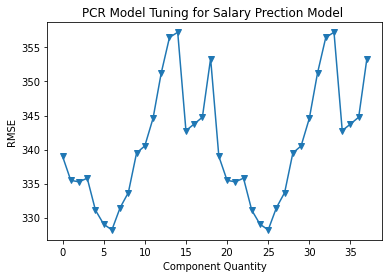

In [146]:
plt.plot(RMSE,"-v") # we can change "-v" like"+" but we should use - to connect the points
plt.xlabel("Component Quantity")
plt.ylabel("RMSE")
plt.title("PCR Model Tuning for Salary Prection Model ") ;

In [147]:
# so we can say that it doesn't mean that when component and variable quantity is equal we can perform well enough
# therefore our comment should be that we can determine component quantity by cross validation method using the train dataset

In [148]:
# do you think it's finished.no.we can also determine final model

In [149]:
# for train dataset

In [152]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:6],y_train)
y_pred=pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train,y_pred)))

308.8265983094501


In [153]:
#for test dataset

In [154]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:6],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_pred,y_test)))

393.1198700096223


In [155]:
#let's summarize the whole process

In [156]:
# first of all we will calculate the error of test and train

In [158]:
# to evaluate these results better is cross validation method

In [159]:
# so when we crossed the validation we will have better rmse outcomes

In [160]:
# we use train dataset to determine the best parameter value

In [161]:
# so our process will be like that

In [162]:
# we will do model tuning operation to find parameter values and,,,,

In [163]:
# with these parameter values will form a final model and,,,,

In [1]:
# upon this final model we will calculate test errors we will approach it by test set

## PLS - Partial Least Squares

In [144]:
# let's set a model

In [145]:
import pandas as pd
import numpy as np

In [146]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
df.head()
y=df["Salary"] # X will be defined after escape from dummies and concat operations

In [147]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])

In [148]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [149]:
X_=df.drop(["Salary","League","NewLeague","Division"],axis=1)
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [150]:
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [151]:
!pip install sklearn
from sklearn.model_selection import train_test_split

In [152]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [153]:
X_train.shape

(197, 19)

In [154]:
y_train.shape

(197,)

In [155]:
X_test.shape

(66, 19)

In [156]:
y_test.shape

(66,)

In [157]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [158]:
pls_model=PLSRegression().fit(X_train,y_train)

In [159]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [160]:
## PREDICTION after modelling

In [161]:
y_pred=pls_model.predict(X_train)

In [162]:
from sklearn.metrics import mean_squared_error

In [163]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred))

In [164]:
rmse_train

310.1167593109696

In [165]:
from sklearn.metrics import r2_score

In [166]:
r2_score(y_train,y_pred)

0.5140424486535482

In [167]:
y_pred=pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [174]:
## MODEL TUNING after prediction

In [180]:
from matplotlib import pyplot as plt

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
from sklearn import model_selection

In [183]:
# cross validation indeed
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


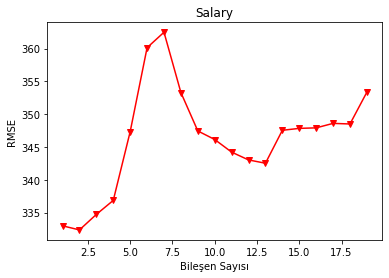

In [184]:
# loop for calculating errors
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [185]:
pls_model=PLSRegression(n_components=2).fit(X_train,y_train)

In [187]:
y_pred=pls_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

398.09956327448526

## Ridge Regression

In [1]:
import pandas as pd
import numpy as np

In [10]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
y=df["Salary"]
dms=pd.get_dummies(df[["League","Division","NewLeague"]]).astype("float64")
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1)
X=pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [12]:
print("X_train shape is:  ",X_train.shape,"y_train shape is: ",y_train.shape,"X_test shape is: ",X_test.shape,"y_test shape is: ",y_test.shape)

X_train shape is:   (197, 19) y_train shape is:  (197,) X_test shape is:  (66, 19) y_test shape is:  (66,)


In [13]:
from sklearn.linear_model import Ridge

In [14]:
# our purpose is to find the coefficient that minimize mse by applying punishments 

In [15]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train) # 0.1 was an example
ridge_model

Ridge(alpha=0.1)

In [16]:
ridge_model.coef_

array([-1.71837351e+00,  6.72185784e+00,  9.01990876e+00, -1.08752472e+00,
       -3.75770955e+00,  5.81994164e+00,  6.23977311e-01, -2.89644738e-01,
        9.33834893e-01,  2.12141129e+00,  7.52740273e-01,  1.10972201e-01,
       -6.48289717e-01,  3.28831626e-01,  3.56744756e-01, -1.97211399e+00,
        3.68214332e+01, -1.43716677e+02,  5.00279389e+00])

In [17]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [21]:
import matplotlib.pyplot as plt

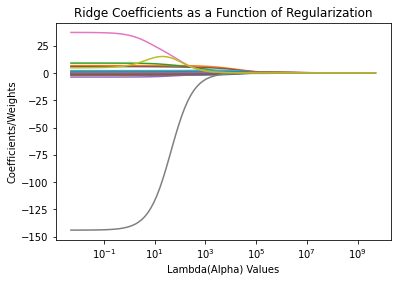

In [22]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

In [29]:
# Prediction after the model

In [30]:
from sklearn.metrics import mean_squared_error 

In [31]:
y_pred=ridge_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

320.96191314495866

In [32]:
# Model Tuning after prediction

In [33]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

In [34]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [35]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [36]:
ridge_cv.alpha_

0.03527401155359316

In [37]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [38]:
rmse=np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))
rmse

313.8995878921992

## Lasso Regression

In [54]:
## model
from warnings import filterwarnings
filterwarnings('ignore')

In [55]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [58]:
lasso_model

Lasso(alpha=0.1)

In [59]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

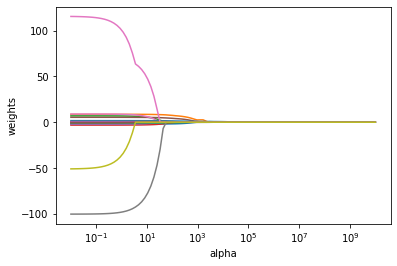

In [60]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [61]:
# Prediction after the Model

In [62]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [64]:
y_pred = lasso_model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

In [66]:
# Model Tuning after the precdiction

In [68]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [69]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [70]:
lasso_cv_model.alpha_

0.39406126432470073

In [71]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [72]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.39406126432470073)

In [73]:
y_pred = lasso_tuned.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

## ElasticNet Regressionn

In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
enet_model = ElasticNet().fit(X_train, y_train)

In [78]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [79]:
enet_model.intercept_

-6.465955602113127

In [80]:
# Prediction

In [82]:
enet_model

ElasticNet()

In [81]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [83]:
y_pred = enet_model.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test, y_pred)

0.41070222469326945

In [88]:
# Model Tuning

In [89]:
from sklearn.linear_model import ElasticNetCV

In [90]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [91]:
enet_cv_model.alpha_

5230.7647364798695

In [92]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [93]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [94]:
y_pred = enet_tuned.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795